C:\Users\user\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


C:\Users\user\Documents\Sussex Projects\Deblending\arch-180130-120929\12-cutout-HSC-G-10055-pdr1_deep.fits


INFO: Auto-setting vmax to  6.038e+00 [aplpy.core]


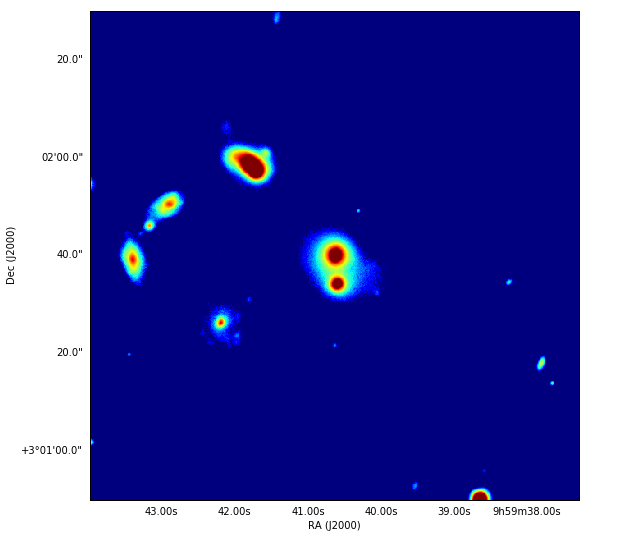

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
import aplpy
import os

topdir = "C:\\Users\\user\\Documents\\Sussex Projects\\Deblending"
fil = "arch-180130-120929\\12-cutout-HSC-G-10055-pdr1_deep.fits"
fildir = os.path.join(topdir,fil)

print(fildir)
gc = aplpy.FITSFigure(fildir)
#gc.show_grayscale(vmin = 0.25, stretch = 'log')
gc.show_colorscale(vmin = 0.5, stretch = 'log')
#gc.show_colorscale(cmap='gist_heat')


In [2]:
from astropy.io import fits
import matplotlib.colors as colors
hdu_list = fits.open('arch-180130-120929/12-cutout-HSC-G-10055-pdr1_deep.fits',ignore_missing_end = True)
hdu_list.info()



Filename: arch-180130-120929/12-cutout-HSC-G-10055-pdr1_deep.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      21   ()      
  1  IMAGE         1 ImageHDU        34   (596, 597)   float32   
  2  MASK          1 ImageHDU        50   (596, 597)   int16 (rescales to uint16)   
  3  VARIANCE      1 ImageHDU        34   (596, 597)   float32   


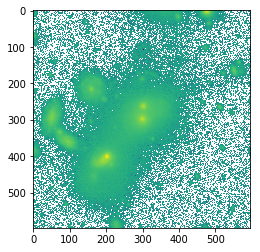

In [3]:
image_data = hdu_list[1].data
plt.imshow(image_data, norm = colors.LogNorm())

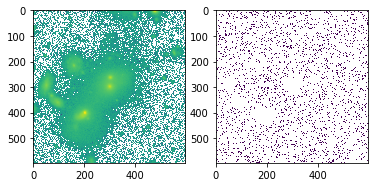

In [4]:
import numpy as np
from scipy.ndimage.filters import maximum_filter
from scipy.ndimage.morphology import generate_binary_structure, binary_erosion

def detect_peaks(image):
    neighbourhood = generate_binary_structure(2,2)
    #print(neighbourhood)
    #print(image)
    local_max = maximum_filter(image, footprint=neighbourhood)==image
    background = (image == 0)
    eroded_background = binary_erosion(background, structure = neighbourhood, border_value = 1)
    detected_peaks = local_max ^ eroded_background
    return detected_peaks
    
detected_peaks = detect_peaks(image_data)
plt.subplot(1,2,1)
plt.imshow(image_data, norm = colors.LogNorm())
plt.subplot(1,2,2)
plt.imshow(detected_peaks, norm = colors.LogNorm())

[[ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]
 [ 1.  1.  1.  1.  1.]]


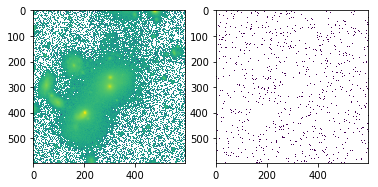

In [5]:
from scipy.ndimage import binary_dilation

def detect_peaks_larger(image):
    neighbourhood = np.ones((5,5))
#    a = np.zeros((5,5))
#    a[2,2] = 1
#    a
#
#    struct = generate_binary_structure(2,2)
#    struct
#    neighbourhood = binary_dilation(a,structure = struct, iterations = 2)#.astype(a.dtype)
    print(neighbourhood)
    local_max = maximum_filter(image, footprint=neighbourhood)==image
    background = (image == 0)
    eroded_background = binary_erosion(background, structure = neighbourhood, border_value = 1)
    detected_peaks = local_max ^ eroded_background
    return detected_peaks

detected_peaks = detect_peaks_larger(image_data)
plt.subplot(1,2,1)
plt.imshow(image_data, norm = colors.LogNorm())
plt.subplot(1,2,2)
plt.imshow(detected_peaks, norm = colors.LogNorm())



In [6]:
image_data
avg = 0
N = 596 ** 2
for i in range(0,595):
    for j in range(0,595):        
        avg += image_data [i][j]
avg /= N
print(avg)

stdev = 0
for i in range(0,595):
    for j in range(0,595):
        if image_data[i][j] > 0:
            stdev += (image_data [i][j] - avg) ** 2
stdev /= N
stdev = np.sqrt(stdev)
print(stdev)



0.156084953932
1.82970386476


In [7]:
for i in range(0,595):
    for j in range(0,595):        
        if image_data [i][j] < (avg + 5 * stdev):
            image_data [i][j] = 0

right = 0
down = 0
for i in range(0,595):
    for j in range(0,595):
        if image_data [i][j] < image_data [i][j+1]:
            right += 1
        if image_data [i][j] < image_data [i+1][j]:
            down += 1
        if image_data [i][j] > image_data [i][j+1] and image_data [i][j] > image_data [i+1][j]:
            print(i,j)
            
print(right)
print(down)

0 475
0 476
0 477
0 478
0 479
0 480
0 481
1 475
1 476
1 477
1 478
1 479
1 480
1 481
2 475
2 476
2 477
2 478
2 479
2 480
2 481
3 475
3 476
3 477
3 478
3 479
3 480
3 481
4 475
4 476
4 477
4 478
4 479
4 480
5 475
5 476
5 477
5 478
5 479
5 480
6 475
6 476
6 477
6 478
6 479
7 475
7 476
7 477
263 301
263 302
263 303
263 304
263 305
264 301
264 302
264 303
264 304
264 305
265 301
265 302
265 303
265 304
266 301
266 302
266 303
267 301
267 302
298 299
298 300
298 301
298 302
298 303
298 304
299 299
299 300
299 301
299 302
299 303
299 304
300 299
300 300
300 301
300 302
300 303
300 304
301 299
301 300
301 301
301 302
301 303
302 299
302 300
302 301
302 302
303 299
303 300
303 301
400 202
400 203
400 204
400 205
400 206
400 207
401 202
401 203
401 204
401 205
401 206
401 207
401 208
401 209
402 202
402 203
402 204
402 205
402 206
402 207
402 208
402 209
403 202
403 203
403 204
403 205
403 206
403 207
403 208
404 202
404 203
404 204
404 205
404 206
404 207
404 208
405 202
405 203
405 204
405 205


[[ True  True  True]
 [ True  True  True]
 [ True  True  True]]
[[ 0.          0.          0.         ...,  0.          0.         -0.07632676]
 [ 0.          0.          0.         ...,  0.          0.         -0.09066477]
 [ 0.          0.          0.         ...,  0.          0.          0.00155755]
 ..., 
 [ 0.          0.          0.         ...,  0.          0.          0.00289015]
 [ 0.00960116  0.03969987  0.05528717 ...,  0.01437523 -0.0324944
  -0.01217952]
 [-0.01303214 -0.02834284  0.00349905 ...,  0.04059736  0.05379386
   0.00664597]]


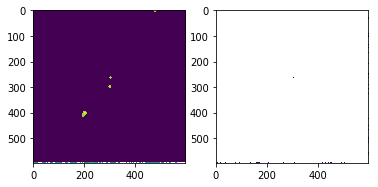

In [9]:
import numpy as np
from scipy.ndimage.filters import maximum_filter
from scipy.ndimage.morphology import generate_binary_structure, binary_erosion, binary_dilation

def detect_peaks(image):
    neighbourhood = generate_binary_structure(2,2)
    print(neighbourhood)
    print(image)
    local_max = maximum_filter(image, footprint=neighbourhood)==image
    background = (image == 0)
    eroded_background = binary_erosion(background, structure = neighbourhood, border_value = 1)
    detected_peaks = local_max ^ eroded_background
    return detected_peaks
    
detected_peaks = detect_peaks(image_data)
plt.subplot(1,2,1)
plt.imshow(image_data, norm = colors.LogNorm())
plt.subplot(1,2,2)
plt.imshow(detected_peaks, norm = colors.LogNorm())